In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pyfolio.utils import extract_rets_pos_txn_from_zipline
from pyfolio.plotting import (plot_perf_stats,
                              show_perf_stats,
                              plot_rolling_beta,
                              plot_rolling_returns,
                              plot_rolling_sharpe,
                              plot_drawdown_periods,
                              plot_drawdown_underwater)

from pyfolio.timeseries import perf_stats, extract_interesting_date_ranges

sns.set_style('whitegrid')

with pd.HDFStore('backtests.h5') as store:
    backtest = store['backtest/equal_weight']
backtest.info()

returns, positions, transactions = extract_rets_pos_txn_from_zipline(backtest)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2013-01-02 00:00:00+00:00 to 2016-12-30 00:00:00+00:00
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   period_open              1008 non-null   datetime64[ns, UTC]
 1   period_close             1008 non-null   datetime64[ns, UTC]
 2   returns                  1008 non-null   float64            
 3   pnl                      1008 non-null   float64            
 4   positions                1008 non-null   object             
 5   long_exposure            1008 non-null   float64            
 6   transactions             1008 non-null   object             
 7   orders                   1008 non-null   object             
 8   starting_value           1008 non-null   float64            
 9   net_leverage             1008 non-null   float64            
 10  short_exposure           1008 non-null   float64

In [4]:
#returns.head().append(returns.tail())

2016-12-23 00:00:00+00:00   -0.000233
2016-12-27 00:00:00+00:00    0.000160
2016-12-28 00:00:00+00:00   -0.000847
2016-12-29 00:00:00+00:00    0.000735
2016-12-30 00:00:00+00:00   -0.000606
Name: returns, dtype: float64

In [5]:
positions.info()
positions.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2013-01-08 00:00:00+00:00 to 2016-12-30 00:00:00+00:00
Columns: 750 entries, Equity(0 [A]) to cash
dtypes: float64(750)
memory usage: 5.8 MB


sid,Equity(0 [A]),Equity(1 [AA]),Equity(2 [AAL]),Equity(7 [AAP]),Equity(8 [AAPL]),Equity(12 [ABBV]),Equity(13 [ABC]),Equity(20 [ABT]),Equity(21 [ACAD]),Equity(27 [ACE]),...,Equity(3156 [XOM]),Equity(3162 [XPO]),Equity(3165 [XRX]),Equity(3171 [YELP]),Equity(3172 [YHOO]),Equity(3175 [YUM]),Equity(3180 [ZBH]),Equity(3194 [ZNGA]),Equity(3197 [ZTS]),cash
index,,,,,,,,,,,,,,,,,,,,,
2013-01-08 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.441446e+06
2013-01-09 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06
2013-01-10 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06
2013-01-11 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06
2013-01-14 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06


In [7]:
positions.columns = [c for c in positions.columns[:-1]] + ['cash']
positions.index = positions.index.normalize()
positions.info()
positions.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2013-01-08 00:00:00+00:00 to 2016-12-30 00:00:00+00:00
Columns: 750 entries, Equity(0 [A]) to cash
dtypes: float64(750)
memory usage: 5.8 MB


,Equity(0 [A]),Equity(1 [AA]),Equity(2 [AAL]),Equity(7 [AAP]),Equity(8 [AAPL]),Equity(12 [ABBV]),Equity(13 [ABC]),Equity(20 [ABT]),Equity(21 [ACAD]),Equity(27 [ACE]),...,Equity(3156 [XOM]),Equity(3162 [XPO]),Equity(3165 [XRX]),Equity(3171 [YELP]),Equity(3172 [YHOO]),Equity(3175 [YUM]),Equity(3180 [ZBH]),Equity(3194 [ZNGA]),Equity(3197 [ZTS]),cash
index,,,,,,,,,,,,,,,,,,,,,
2013-01-08 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.441446e+06
2013-01-09 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06
2013-01-10 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06
2013-01-11 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06
2013-01-14 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06


In [8]:
transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6505 entries, 2013-01-08 21:00:00+00:00 to 2016-12-30 21:00:00+00:00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   sid          6505 non-null   object             
 1   symbol       6505 non-null   object             
 2   price        6505 non-null   float64            
 3   order_id     6502 non-null   object             
 4   amount       6505 non-null   int64              
 5   commission   0 non-null      object             
 6   dt           6505 non-null   datetime64[ns, UTC]
 7   txn_dollars  6505 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(4)
memory usage: 457.4+ KB


,sid,symbol,price,order_id,amount,commission,dt,txn_dollars
2013-01-08 21:00:00+00:00,Equity(85 [AGN]),Equity(85 [AGN]),86.680005,2525687d3f34411e8d887411f2c7fdac,2334,None,2013-01-08 21:00:00+00:00,-202311.131306
2013-01-08 21:00:00+00:00,Equity(213 [ARIA]),Equity(213 [ARIA]),19.651001,865c3d87a1814eb8a2eb305d02ab1173,7590,None,2013-01-08 21:00:00+00:00,-149151.099321
2013-01-08 21:00:00+00:00,Equity(367 [BIIB]),Equity(367 [BIIB]),144.390001,834430225bcb4284ad1f00d960e286c4,1365,None,2013-01-08 21:00:00+00:00,-197092.351185
2013-01-08 21:00:00+00:00,Equity(811 [DFS]),Equity(811 [DFS]),40.090001,c74700e045374764a5b27a4ac05b516e,5073,None,2013-01-08 21:00:00+00:00,-203376.572741
2013-01-08 21:00:00+00:00,Equity(1059 [FDO]),Equity(1059 [FDO]),57.320002,befcf38f345e40f090eb578028fd75e6,3496,None,2013-01-08 21:00:00+00:00,-200390.728571


In [9]:
transactions.symbol = transactions.symbol.apply(lambda x: x.symbol)
transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6505 entries, 2013-01-08 21:00:00+00:00 to 2016-12-30 21:00:00+00:00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   sid          6505 non-null   object             
 1   symbol       6505 non-null   object             
 2   price        6505 non-null   float64            
 3   order_id     6502 non-null   object             
 4   amount       6505 non-null   int64              
 5   commission   0 non-null      object             
 6   dt           6505 non-null   datetime64[ns, UTC]
 7   txn_dollars  6505 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(4)
memory usage: 457.4+ KB


,sid,symbol,price,order_id,amount,commission,dt,txn_dollars
2013-01-08 21:00:00+00:00,Equity(85 [AGN]),AGN,86.680005,2525687d3f34411e8d887411f2c7fdac,2334,None,2013-01-08 21:00:00+00:00,-202311.131306
2013-01-08 21:00:00+00:00,Equity(213 [ARIA]),ARIA,19.651001,865c3d87a1814eb8a2eb305d02ab1173,7590,None,2013-01-08 21:00:00+00:00,-149151.099321
2013-01-08 21:00:00+00:00,Equity(367 [BIIB]),BIIB,144.390001,834430225bcb4284ad1f00d960e286c4,1365,None,2013-01-08 21:00:00+00:00,-197092.351185
2013-01-08 21:00:00+00:00,Equity(811 [DFS]),DFS,40.090001,c74700e045374764a5b27a4ac05b516e,5073,None,2013-01-08 21:00:00+00:00,-203376.572741
2013-01-08 21:00:00+00:00,Equity(1059 [FDO]),FDO,57.320002,befcf38f345e40f090eb578028fd75e6,3496,None,2013-01-08 21:00:00+00:00,-200390.728571


In [10]:
HDF_PATH = Path('..', 'data', 'assets.h5')
assets = positions.columns[:-1]
with pd.HDFStore(HDF_PATH) as store:
    df = store.get('us_equities/stocks')['sector'].dropna()
    df = df[~df.index.duplicated()]
df.info()
df.head()

<class 'pandas.core.series.Series'>
Index: 5288 entries, PIH to ZYME
Series name: sector
Non-Null Count  Dtype 
--------------  ----- 
5288 non-null   object
dtypes: object(1)
memory usage: 82.6+ KB


ticker
PIH                Finance
PIHPP              Finance
TURN               Finance
FLWS     Consumer Services
FCCY               Finance
Name: sector, dtype: object

In [12]:
sector_map = df.reindex(assets).fillna('Unknown').to_dict() #结果全是Unknown

In [13]:
with pd.HDFStore(HDF_PATH) as store:
    benchmark_rets = store['sp500/fred'].close.pct_change()
benchmark_rets.name = 'S&P500'
benchmark_rets = benchmark_rets.tz_localize('UTC').filter(returns.index)
benchmark_rets.tail()

DATE
2016-12-23 00:00:00+00:00    0.001252
2016-12-27 00:00:00+00:00    0.002248
2016-12-28 00:00:00+00:00   -0.008357
2016-12-29 00:00:00+00:00   -0.000293
2016-12-30 00:00:00+00:00   -0.004637
Name: S&P500, dtype: float64

In [14]:
perf_stats(returns=returns, factor_returns=benchmark_rets)
#            positions=positions, 
#            transactions=transactions)

Annual return          0.019619
Cumulative returns     0.080817
Annual volatility      0.047487
Sharpe ratio           0.432879
Calmar ratio           0.336024
Stability              0.555919
Max drawdown          -0.058387
Omega ratio            1.085094
Sortino ratio          0.630497
Skew                   0.223701
Kurtosis               6.125539
Tail ratio             0.988875
Daily value at risk   -0.005901
Alpha                  0.005560
Beta                   0.143014
dtype: float64

In [52]:
#index维度，returns比benchmark_rets长，需要截断；有如下两种方式：
returns = returns.loc[benchmark_rets.index]
#b = pd.Timestamp('2014-01-13', tz=UTC)
#e = pd.Timestamp('2016-12-30', tz=UTC)
#returns = returns.loc[b:e]
returns.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 749 entries, 2014-01-13 00:00:00+00:00 to 2016-12-30 00:00:00+00:00
Series name: returns
Non-Null Count  Dtype  
--------------  -----  
749 non-null    float64
dtypes: float64(1)
memory usage: 11.7 KB


In [18]:
benchmark_rets.info()
benchmark_rets.head()

<class 'pandas.core.series.Series'>
DatetimeIndex: 749 entries, 2014-01-13 00:00:00+00:00 to 2016-12-30 00:00:00+00:00
Series name: S&P500
Non-Null Count  Dtype  
--------------  -----  
748 non-null    float64
dtypes: float64(1)
memory usage: 27.9 KB


DATE
2014-01-13 00:00:00+00:00         NaN
2014-01-14 00:00:00+00:00    0.010818
2014-01-15 00:00:00+00:00    0.005166
2014-01-16 00:00:00+00:00   -0.001347
2014-01-17 00:00:00+00:00   -0.003895
Name: S&P500, dtype: float64

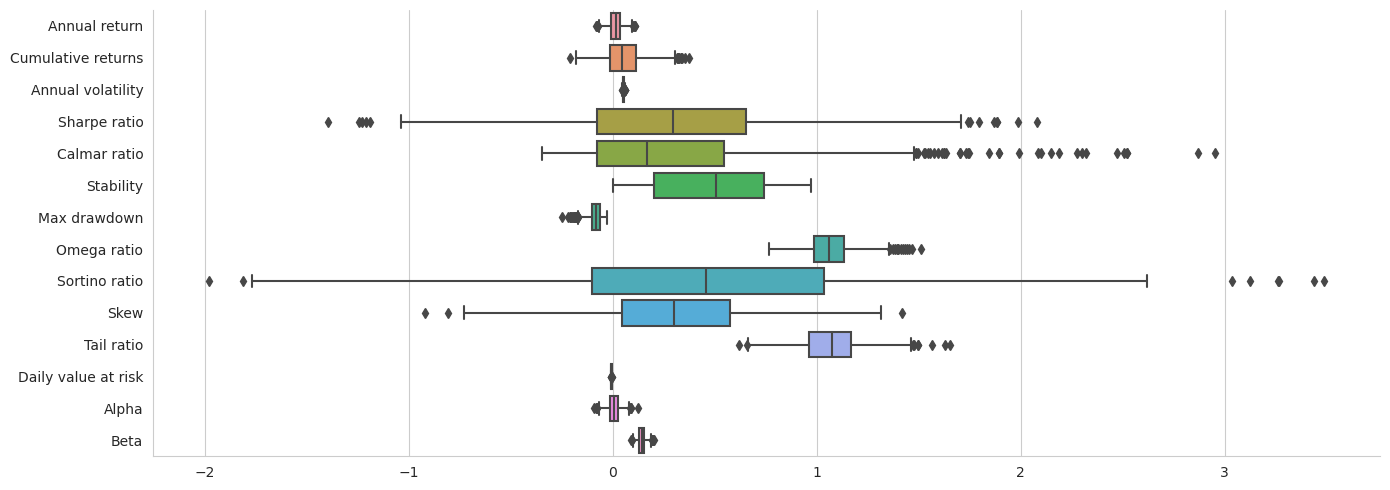

In [53]:
fig, ax = plt.subplots(figsize=(14, 5))
plot_perf_stats(returns=returns, 
                factor_returns=benchmark_rets,     
                ax=ax)
sns.despine()
fig.tight_layout();

In [54]:
oos_date = '2016-01-01'
show_perf_stats(returns=returns, 
                factor_returns=benchmark_rets, 
                positions=positions, 
                transactions=transactions, 
                live_start_date=oos_date)

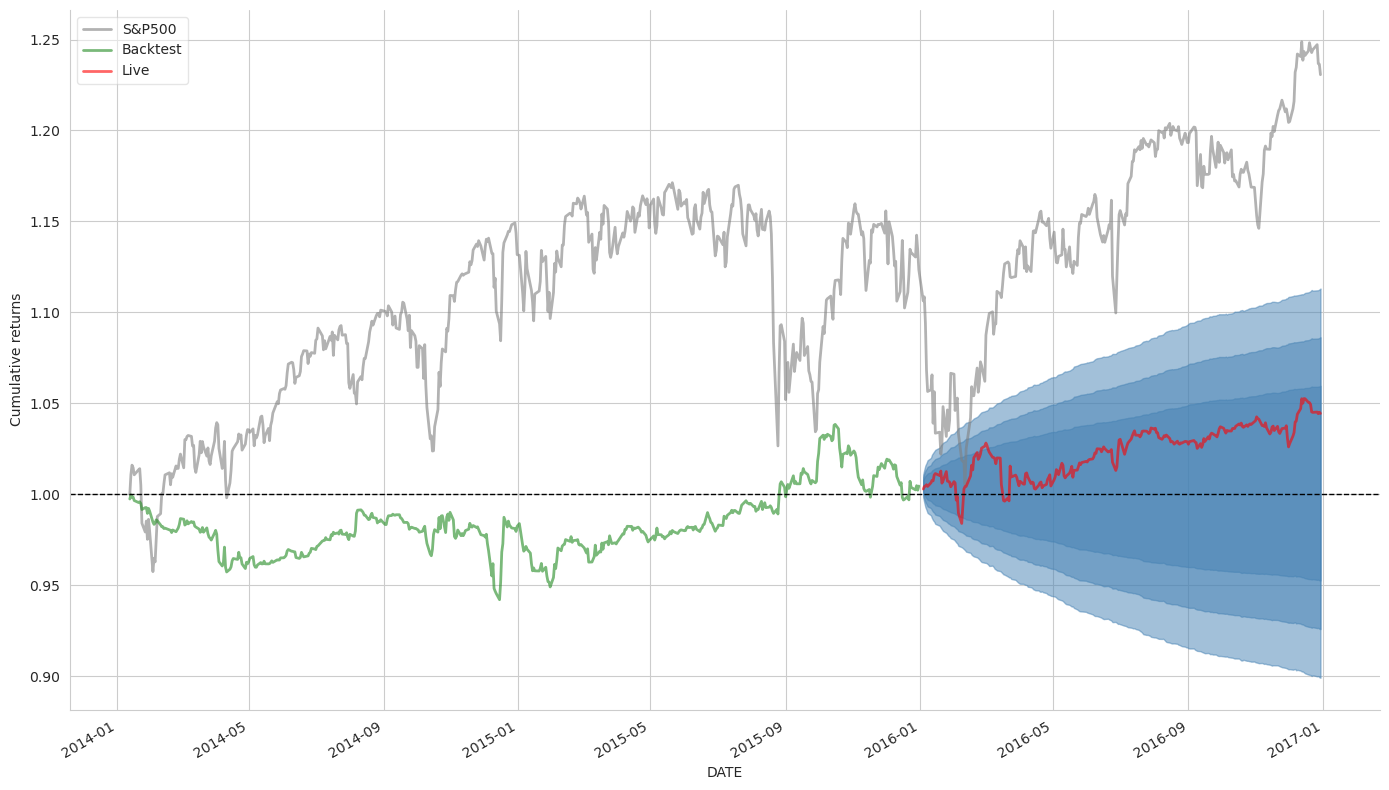

In [55]:
plot_rolling_returns(returns=returns, 
                     factor_returns=benchmark_rets, 
                     live_start_date=oos_date, 
                     cone_std=(1.0, 1.5, 2.0))
plt.gcf().set_size_inches(14, 8)
sns.despine()
plt.tight_layout();

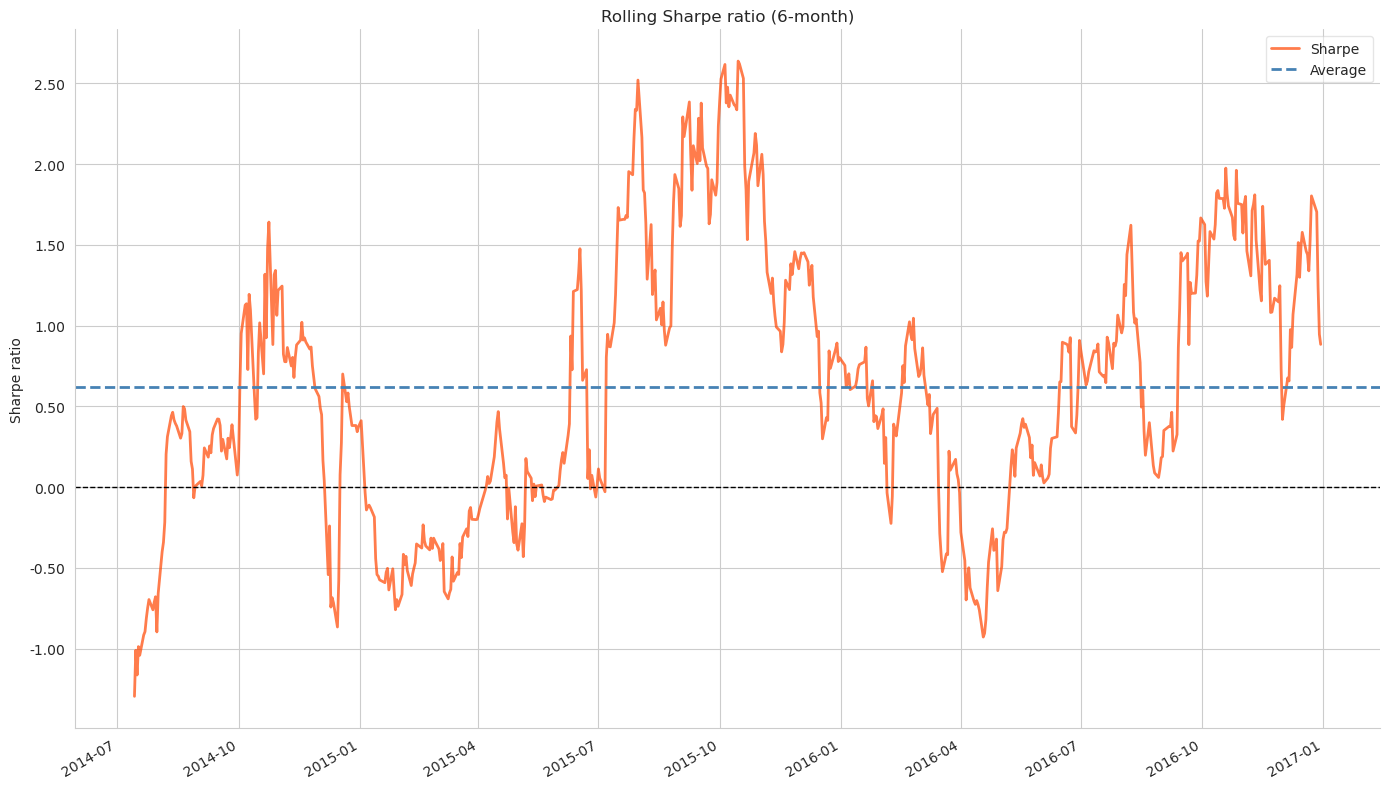

In [56]:
plot_rolling_sharpe(returns=returns)
plt.gcf().set_size_inches(14, 8)
sns.despine()
plt.tight_layout();

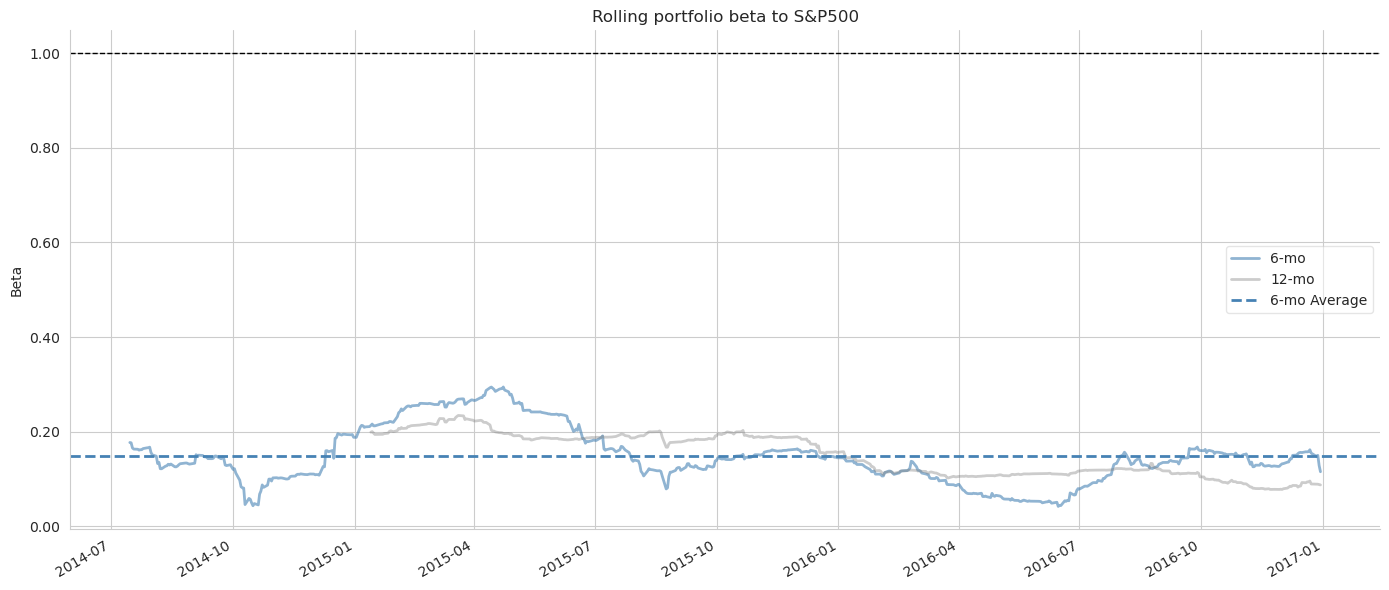

In [57]:
plot_rolling_beta(returns=returns, factor_returns=benchmark_rets)
plt.gcf().set_size_inches(14, 6)
sns.despine()
plt.tight_layout();

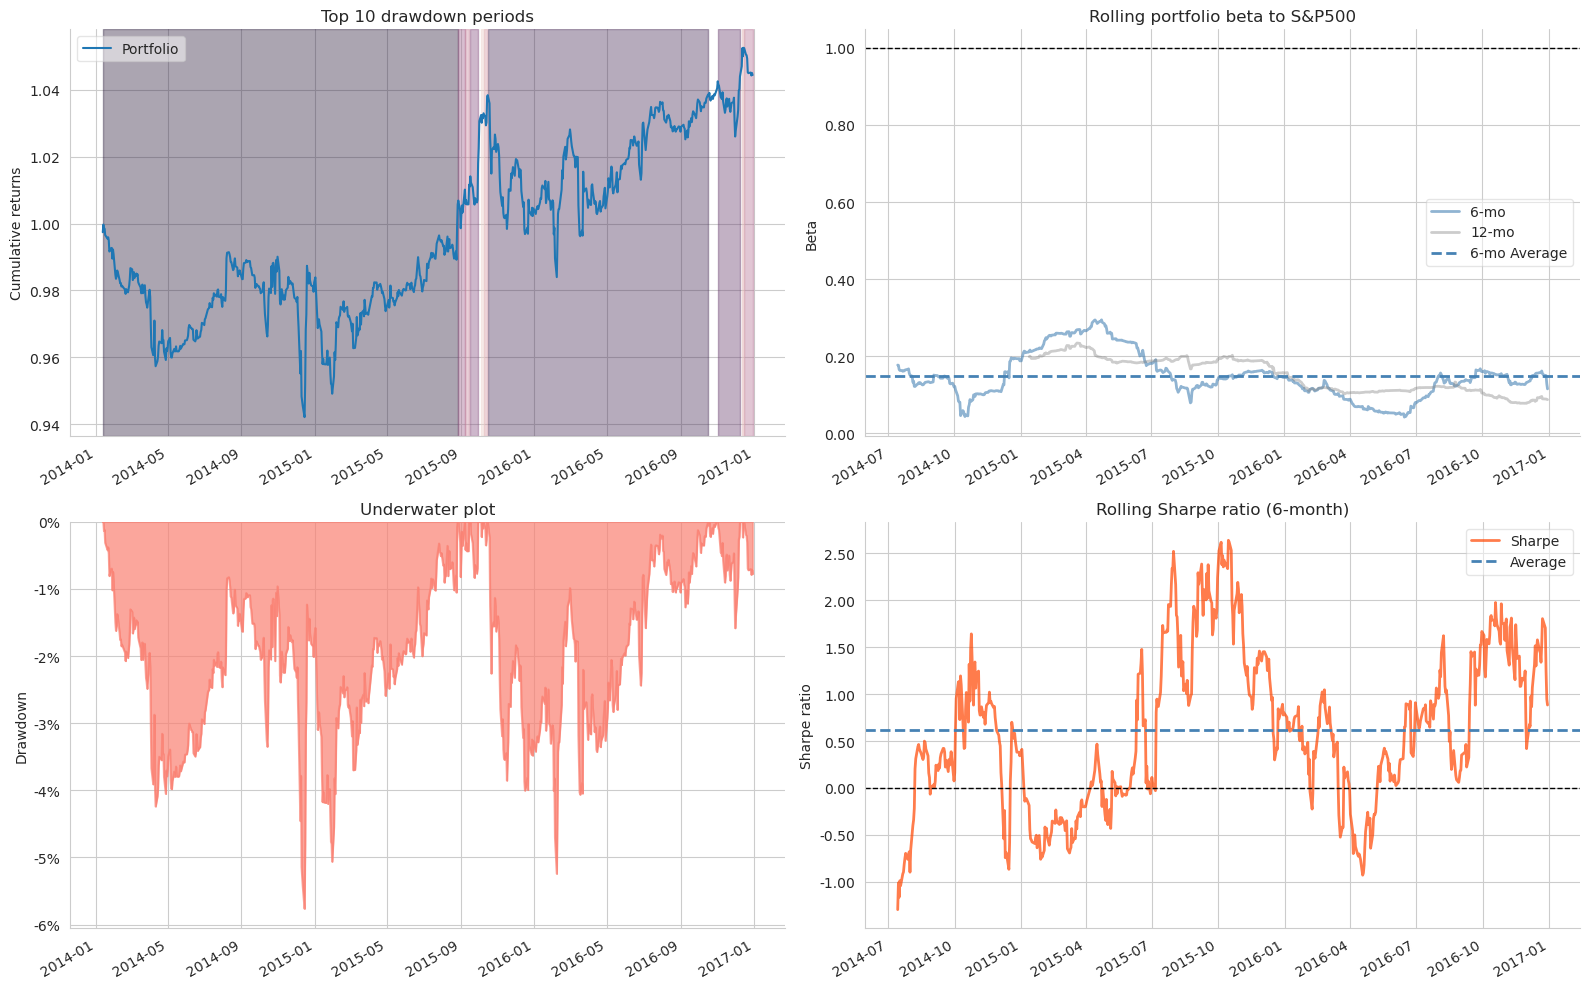

In [58]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = ax.flatten()

plot_drawdown_periods(returns=returns, ax=axes[0])
plot_rolling_beta(returns=returns, factor_returns=benchmark_rets, ax=axes[1])
plot_drawdown_underwater(returns=returns, ax=axes[2])
plot_rolling_sharpe(returns=returns)
sns.despine()
plt.tight_layout();

In [60]:
interesting_times = extract_interesting_date_ranges(returns=returns)
interesting_times.keys()

odict_keys(['Apr14', 'Oct14', 'Fall2015', 'New Normal'])

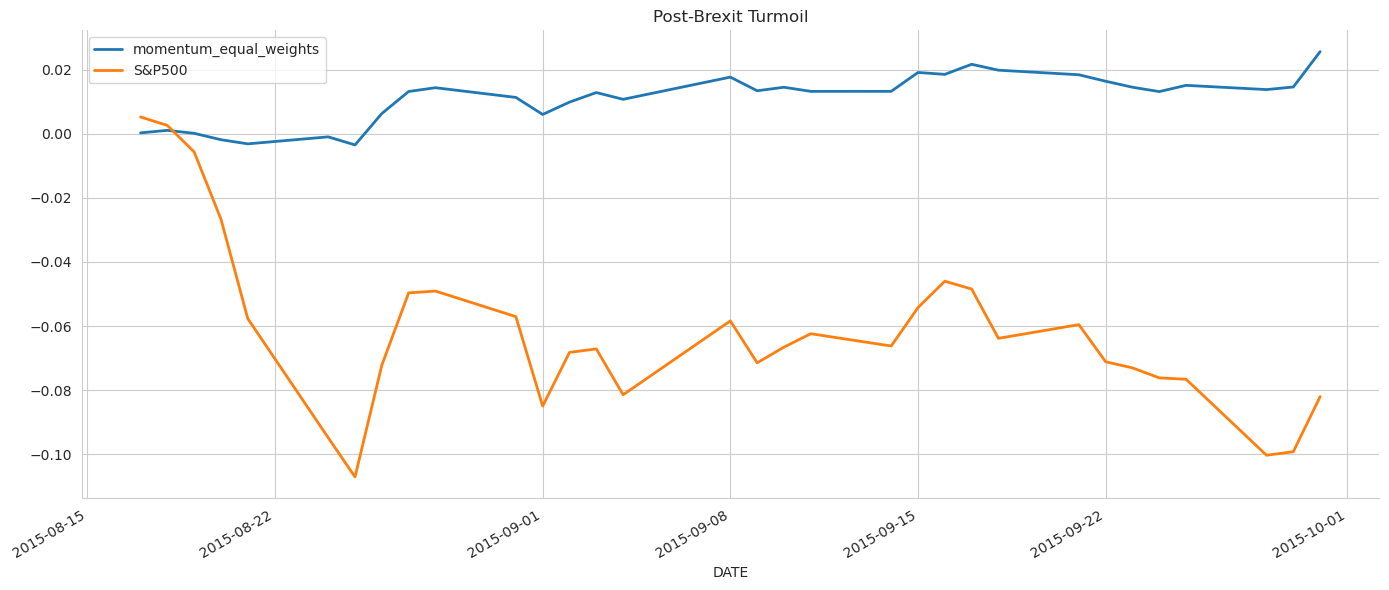

In [61]:
interesting_times = extract_interesting_date_ranges(returns=returns)
(interesting_times['Fall2015']
 .to_frame('momentum_equal_weights').join(benchmark_rets)
 .add(1).cumprod().sub(1)
 .plot(lw=2, figsize=(14, 6), title='Post-Brexit Turmoil'))
sns.despine()
plt.tight_layout();